# 一、python 实践

## 1.1 求极限

### a. 使用 python 编程求 $\lim_{x \to \infty} \frac{\sin x}{x}$

In [1]:
import sympy
from sympy import oo
# 导入 sympy 符号 x
from sympy.abc import x

# 函数定义
f = sympy.sin(x) / x
# 求极限
# 参数1: 函数
# 参数2: 求极限的变量符号
# 参数3: 极限趋紧位置的值
result = sympy.limit(f, x, oo)
result

0

### b. 使用 python 编程求 $\lim_{x \to 1} \frac{x^2-1}{x-1}$

In [2]:
import sympy
from sympy.abc import x

# 函数定义
f = (x ** 2 - 1) / (x - 1)
# 求极限
result = sympy.limit(f, x, 1)
result

2

## 1.2 求导数
### 求导 $y = \arcsin \sqrt{\sin (x)}$

In [3]:
import sympy
from sympy.abc import x

# 定义表达式
y = sympy.asin(sympy.sqrt(sympy.sin(x)))
# 求导
# 参数1: 求导的表达式
# 参数2: 对谁求导
result = sympy.diff(y, x)
result

cos(x)/(2*sqrt(1 - sin(x))*sqrt(sin(x)))

## 1.3 求偏导
### 求函数$f(x, y) = x^2 + 3xy + y^2$ 在 (1, 2) 处的偏导数

In [4]:
import sympy
from sympy.abc import x, y

# 定义表达式
f = x ** 2 + 3 * x * y + y ** 2
# 求 f 对 x 的偏导
dx = sympy.diff(f, x)
# 求 f 对 y 的偏导
dy = sympy.diff(f, y)

# 对偏导表达式赋值
point = {x: 1, y: 2}
dxv = dx.evalf(subs=point)
dyv = dy.evalf(subs=point)

f"对 x 偏导为 {dx} = {dxv}, 对 y 偏导为 {dy} = {dyv}"

'对 x 偏导为 2*x + 3*y = 8.00000000000000, 对 y 偏导为 3*x + 2*y = 7.00000000000000'

## 1.4 求方向导数
### 求 $z = x e^{2y}$ 在点 P(0, 1) 处沿 P(0, 1) 到点 Q(2, -1) 方向的方向导数

In [5]:
import sympy
from sympy.abc import x, y

# 定义表达式
z = x * sympy.exp(2 * y)
# 对 x 偏导
zdx = sympy.diff(z, x)
# 对 y 偏导
zdy = sympy.diff(z, y)

point_p = {x: 1, y: 0}
# 方向角度
angle = -sympy.pi / 4
# 计算方向导数
result = zdx.evalf(subs=point_p) * sympy.cos(angle) + zdy.evalf(subs=point_p) * sympy.sin(angle)
result

-0.5*sqrt(2)

## 1.5 求梯度
### 求 $u=xyz + z^2+ 5$ 的梯度 grad_u 以及在点 M(0, 1, -1) 处的方向导数的最大值

In [6]:
import sympy
from sympy.abc import x, y, z

# 定义表达式
u = x * y * z + z ** 2 + 5
# 求三个偏导
udx = sympy.diff(u, x)
udy = sympy.diff(u, y)
udz = sympy.diff(u, z)
point_m = {x: 0, y: 1, z: -1}
# 梯度
grad_u = [udx.evalf(subs=point_m), udy.evalf(subs=point_m), udz.evalf(subs=point_m)]
# 最大方向导数就是沿梯度方向
max_grad_u = sympy.sqrt(grad_u[0] ** 2 + grad_u[1] ** 2 + grad_u[2] ** 2)

f"梯度: {grad_u}, 最大的方向导数: {max_grad_u}"

'梯度: [-1.00000000000000, 0, -2.00000000000000], 最大的方向导数: 2.23606797749979'

## 1.6 梯度下降法
### 使用 python 求一下函数 $minf(x) = x - y + 2x^2 + 2xy + y^2$ 的最小值, 初值 (0, 0)

In [7]:
import sympy
from sympy.abc import x, y

# 定义表达式
f = x - y + 2 * x ** 2 + 2 * x * y + y ** 2
# x 偏导
dx = sympy.diff(f, x)
# y 偏导
dy = sympy.diff(f, y)

# 梯度下降
lr = 0.01  # 学习率
v_x, v_y = 0, 0  # 初始值
new_x, new_y = 0, 0
finished = False

while not finished:
    point = {x: v_x, y: v_y}
    new_x -= lr * dx.evalf(subs=point)
    new_y -= lr * dy.evalf(subs=point)
    if f.evalf(subs=point) - f.evalf(subs={x: new_x, y: new_y}) < 7e-9:
        finished = True

    v_x, v_y = new_x, new_y

f"最小值在({v_x}, {v_y})点取得，值为{f.evalf(subs={x: v_x, y: v_y})}"

'最小值在(-0.999429965989565, 1.49907766559637)点取得，值为-1.24999955094566'

## 本章练习
### a. 求一下问题的极限
* $\lim_{x \to 1} \sin{(\ln{x})}$
* $\lim_{x \to 8} \frac{\sqrt[3]{x} - 2}{x-8}$

In [8]:
import sympy
from sympy.abc import x

# 定义两个表达式
f1 = sympy.sin(sympy.log(x))
f2 = (x ** 3) - 2 / (x - 8)
# 分别求极限
f1.limit(x, 2), f2.limit(x, 8)

(sin(log(2)), -oo)

### b. 求导

In [9]:
import sympy
from sympy.abc import x

# 定义函数表达式
y = x ** 4 - 2 * x ** 3 + 5 * sympy.sin(x) + sympy.log(3)
# 对 x 求导
y.diff(x)

4*x**3 - 6*x**2 + 5*cos(x)

### c. 求函数$z = x^2 + y^2$在点 (1,2) 处沿点 (1,2)到点 $(2, 2 + \sqrt{3})$方向的方向导数，以及在点（1,2）处的梯度

In [10]:
import sympy
from sympy.abc import x, y

z = x ** 2 + y ** 2

# 角度
angle = sympy.pi / 3
point = {x: 1, y: 2}
# 偏导
dx = z.diff(x)
dy = z.diff(y)
# 方向导数
result = dx.evalf(subs=point) * sympy.cos(angle) + dy.evalf(subs=point) * sympy.sin(angle)

grad = [dx.evalf(subs=point), dy.evalf(subs=point)]

f'方向导数{result}, 梯度为{grad}'

'方向导数1.0 + 2.0*sqrt(3), 梯度为[2.00000000000000, 4.00000000000000]'

# 二、微积分
## 2.1 单积分

### a. 用函数实现 $\int_{0}^{3} \cos^2{(e^x)}dx$

In [11]:
import numpy as np

# 积分上下限
a, b = 0, 3


def f(x):
    return np.cos(np.exp(x)) ** 2


# 积分定义法求
def trap(n):
    h = (b - a) / n
    x = a
    sum = 0
    for i in range(1, n):
        x2 = a + i * h
        sum = sum + (f(x) + f(x2)) * h / 2
        x = x2
    return sum


trap(10000)

1.296434741500134

### b. 用scipy求 $\int_{0}^{3} \cos^2{(e^x)}dx$

In [12]:
from scipy.integrate import quad

#被积函数
func = lambda x: np.cos(np.exp(x)) ** 2
# 调用函数求积分
solution = quad(func, 0, 3)

solution

(1.296467785724373, 1.397797106902389e-09)

## 2.2 二重积分
### 使用 scipy 计算 $\iint\limits_{D: \{(x, y)| 0 \le x \le 10, 0 \le y \le 10\}} e^{-x^2-y^2}$

In [13]:
import numpy as np
from scipy.integrate import dblquad


def f(x, y):
    return np.exp(- x ** 2 - y ** 2)


solution, aberr = dblquad(f, 0, 10, 0, 10)

solution, aberr

(0.7853981633974476, 1.3753098510206357e-08)

## 本章练习
### 使用 scipy 求下面定积分
* $\int_{1}^{2}(x^2 + \frac{1}{x^4}) dx$
* $\int_{-1}^{0}\frac{3x^4 + 3x^2 + 1}{x^2 + 1}$

In [14]:
from scipy.integrate import quad

f1 = lambda x: x ** 2 + x ** -4
f2 = lambda x: (3 * x ** 4 + 3 * x ** 2 + 1) / (x ** 2 + 1)

quad(f1, 1, 2), quad(f2, -1, 0)

((2.625, 2.914335439641036e-14), (1.7853981633974483, 1.9821901491273144e-14))

# 三、泰勒公式和拉格朗日乘子法
## 3.1 利用泰勒多项式展开求近似
### 根据 $e^x$ 的 n 次泰勒多项式展开，求解无理数 e 的近似值
$e^{x} = 1 + x + \frac{x^2}{2!} + \cdots + \frac{x^n}{n!} + o(x^n)$

In [15]:
from math import factorial


def f(n):
    if n == 0:
        return 1
    else:
        ret = 1
        for i in range(1, n + 1):
            # 直接用函数求阶乘
            ret += 1.0 / factorial(i)
        return ret


f(0), f(10), f(100)

(1, 2.7182818011463845, 2.7182818284590455)

## 3.2 求解拉格朗日乘子法
### 求函数 $u = x^3y^2z$ 在 $x + y + z = 12$ 条件下的最大值

In [16]:
from sympy import diff, solve
from sympy.abc import x, y, z, l

# 定义拉格朗日等式
F = x ** 3 * y ** 2 * z + l * (x + y + z - 12)

# 求偏导
dx = diff(F, x)
dy = diff(F, y)
dz = diff(F, z)
dl = diff(F, l)

# 求解
# 参数1: 求解的表达式列表，解要让这些表达式都为 0
# 参数2: 参与求解的变量
result = solve([dx, dy, dz, dl], [x, y, z, l])

# 过滤掉 l = 0 的值
result = [f'x={i[0]}, y={i[1]}, z={i[2]}, F={F.evalf(subs={x: i[0], y: i[1], z: i[2]})}' for i in result if i[-1] != 0]

result

['x=6, y=4, z=2, F=6912.00000000000']

## 本章练习
### 求目标函数 V = xyz 在 xy + yz + xz = 6 的条件下的最大值

In [17]:
from sympy import diff, solve
from sympy.abc import x, y, z, l

# 定义拉格朗日等式
V = x * y * z + l * (x * y + y * z + z * x - 6)

# 求偏导
dx = diff(V, x)
dy = diff(V, y)
dz = diff(V, z)
dl = diff(V, l)

# 求解
# 参数1: 求解的表达式列表，解要让这些表达式都为 0
# 参数2: 参与求解的变量
result = solve([dx, dy, dz, dl], [x, y, z, l])

# 过滤掉 l = 0 的值
result = [(i[0], i[1], i[2], V.evalf(subs={x: i[0], y: i[1], z: i[2]})) for i in result if i[-1] != 0]
# 过滤掉 V < 0 的值
result = [f'x={x}, y={y}, z={z}, V={V}' for (x, y, z, V) in result if V >= 0]
result

['x=sqrt(2), y=sqrt(2), z=sqrt(2), V=2.82842712474619']

# 四、线性代数基础
## 4.1 求解线性方程组
### 求解线性方程组，使用 $X = A^{-1}B$; numpy.linalg.solve(); sympy.solve() 三种方式求解
$$
\left\{
    \begin{align}
    x + y + z = 2 \\
    x + 2y + 4z = 3 \\
    x + 3y + 9z = 5 \\
    \end{align}
\right.
$$

In [18]:
import numpy as np
import sympy as sp
from sympy.abc import x, y, z

A = np.array([
    [1, 1, 1],
    [1, 2, 4],
    [1, 3, 9]
])

B = np.array([2, 3, 5])

# 求逆
X1 = np.linalg.inv(A) @ B
# numpy
X2 = np.linalg.solve(A, B)

X_array = [
    x + y + z - 2,
    x + 2 * y + 4 * z - 3,
    x + 3 * y + 9 * z - 5
]
# sympy 方式
X3 = sp.solve(X_array, [x, y, z])
X1, X2, X3

(array([ 2. , -0.5,  0.5]), array([ 2. , -0.5,  0.5]), {x: 2, y: -1/2, z: 1/2})

# 五、特征值与矩阵分解
## 5.1 使用 SVD 对图像进行压缩

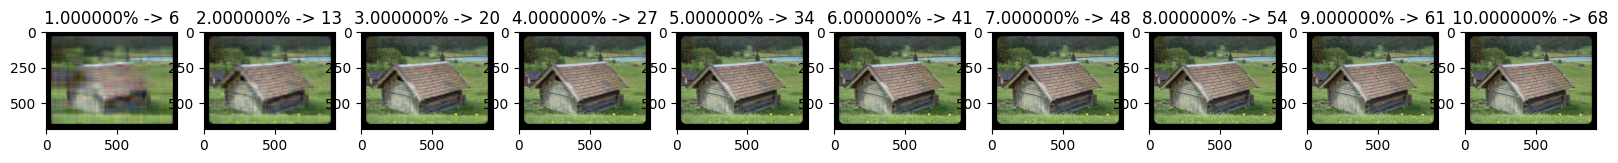

In [19]:
from PIL import Image
import matplotlib.pyplot as plt

# 读取图片，处理 RGB 分量
img = Image.open('A.png', 'r')
img = np.array(img)
img_R = img[:, :, 0]
img_G = img[:, :, 1]
img_B = img[:, :, 2]


def svd(data: np.ndarray, r: int) -> np.ndarray:
    """
    对输入数据进行 svd 分解，并保留前 r 维的数据 
    :param data: 原始数据
    :param r: 保留的前 r 维的值
    :return: 
    """
    u, gama, v = np.linalg.svd(data)
    # 奇异值生成对角阵
    gama = np.diag(gama)

    # 对 m * n 的数据 data
    # u 保存 m * r
    u = u[:, :r]
    # 奇异值矩阵 保存 r * r
    gama = gama[:r, :r]
    # v 保存 r * n
    v = v[:r, :]

    # 计算压缩后的数据
    ret = (u @ gama) @ v
    # 处理不满足要求的色块
    ret[ret < 0] = 0
    ret[ret > 255] = 255
    # 保存为 uint8 类型, 因为 rgb 色值不为 float
    return ret.astype('uint8')


def show(per: float, ax: plt.Subplot):
    """
    在 ax 的位置展示 1 - per% 损失度的图片
    :param per: 
    :param ax: 
    :return: 
    """
    # 计算 per% 所占的图片长度
    width = int(min(img_G.shape[0], img_G.shape[1]) * per)
    # 标题
    ax.set_title("%f%% -> %d" % (per * 100, width))

    # rgb 分别 svd 分解
    svd_r = svd(img_R, width)
    svd_g = svd(img_G, width)
    svd_b = svd(img_B, width)
    # 重建图片
    image = np.stack((svd_r, svd_g, svd_b), 2)
    image = Image.fromarray(image)
    # Image.fromarray(image).save("{}.jpg".format(width))
    # 在指定位置展示
    ax.imshow(image)


# 生成一个 1 * 10 的绘图列表
fig, axes = plt.subplots(1, 10, figsize=(20, 8))  # type: plt.Figure, plt.Subplot

# 绘图
for i in range(0, 10):
    # 绘制保留 (i + 1)% 的奇异值分解的图像, 在第 i 个位置
    show((i + 1) / 100, axes[i])


# 六、概率论基础

## 6.1 创建连续概率密度、分布函数和变量

### 输出正态分布函数和分布图 $f(x) = \frac{1}{\sqrt{2\pi} \sigma} exp(-\frac{(x-\mu)^2}{2\sigma^2})$

(0.9855407685211878, 1.9902346689546393)

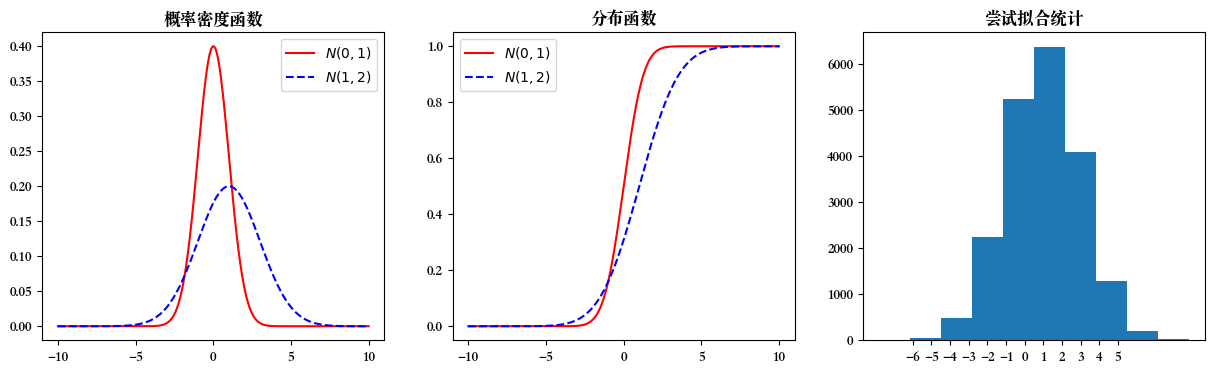

In [20]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

# 默认 loc=0, scale=1 标准正台
X = ss.norm()  # type: ss.rv_continuous
Y = ss.norm(loc=1.0, scale=2.0)  # type: ss.rv_continuous

t = np.arange(-10, 10, 0.01)

# macOs 中文
plt.rcParams['font.family'] = ['Songti SC', 'Gill Sans']
# windows 中文
# plt.rcParams['font.family'] = ['Microsoft YaHei']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # type: plt.Figure, list[plt.Axes]

# pdf Probability density function 概率密度函数
axes[0].plot(t, X.pdf(t), label="$N(0, 1)$", color='r')
axes[0].plot(t, Y.pdf(t), 'b--', label='$N(1, 2)$')
axes[0].set_title("概率密度函数")
axes[0].legend()

# cdf Cumulative distribution function 分布函数
axes[1].plot(t, X.cdf(t), label="$N(0, 1)$", color='r')
axes[1].plot(t, Y.cdf(t), 'b--', label='$N(1, 2)$')
axes[1].set_title("分布函数")
axes[1].legend()

# 生成满足分布的随机变量 Random variates
Y1 = Y.rvs(size=20000)
axes[2].hist(Y1)
axes[2].set_title("尝试拟合统计")
plt.xticks(np.arange(-6, 6, 1))

ss.norm.fit(Y1)

## 6.2 创建离散概率函数和分布图，变量

### 画出如下概率函数及其分布函数图

|---|---|---|---|---|---|
|x|0|1|2|3|4|
|对应概率|1/16|1/4|3/8|1/4|1/16|

Text(0.5, 1.0, '分布函数')

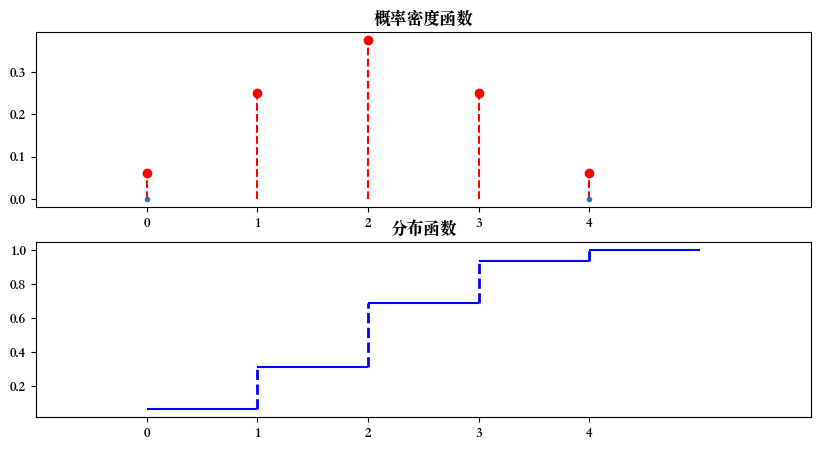

In [21]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

# 概率密度
xk = range(5)
pk = [1 / 16, 1 / 4, 3 / 8, 1 / 4, 1 / 16]

# 离散分布
custome = ss.rv_discrete(values=(xk, pk))

# 生成离散分布的值， 采样20次
custome1 = custome.rvs(size=20)
custome1.reshape(-1, 10)

# macOs 中文
plt.rcParams['font.family'] = ['Songti SC', 'Gill Sans']
# windows 中文
# plt.rcParams['font.family'] = ['Microsoft YaHei']

_, (ax0, ax1) = plt.subplots(2, figsize=(10, 5))  # type: plt.Figure, (plt.Axes, plt.Axes)

ax0.set_title("概率密度函数")
# 针状图
ax0.stem(xk, pk, markerfmt='ro', linefmt='r--', basefmt=".")
ax0.set_xlim(-1, 6)
ax0.set_xticks(np.arange(0, 5, 1))

# 分布函数
pk1 = custome.cdf(xk)
x_max = range(1, 6)
xk1 = range(1, 5)
# 为了生成横线
y_min = pk1[0:4]
y_max = pk1[1:5]

ax1.hlines(pk1, xk, x_max, linestyles='-', colors='b')
ax1.set_xlim(-1, 6)
ax1.set_xticks(np.arange(0, 5, 1))

ax1.vlines(xk1, y_min, y_max, colors='b', linestyles='--', lw=2)
ax1.set_title("分布函数")

## 习题
### a. 已知某路口发生事故的平均概率是每天2次，并且服从泊松分布，用python给出每天发生0、1、2、3、4次事故的概率分别是多少？
$P(X = x) = \frac{\lambda^{x} e^{-\lambda}}{x!}$

<StemContainer object of 3 artists>

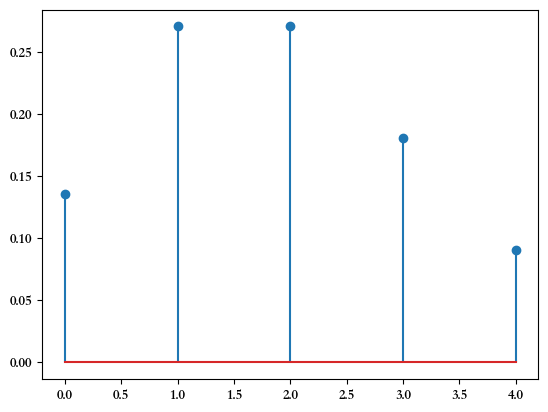

In [22]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

# 柏松分布, lambda = 2
mu = 2
poisson = ss.poisson(mu)

# 发生次数 0, 1, 2, 3, 4
X = np.arange(0, 5, step=1)  # type: np.ndarray
plt.stem(poisson.pmf(X))

### b. 计算50个人中出现同一天生日的概率

In [23]:
from math import factorial

# 统计 10000 次
counter, times = 0, int(1e4)

for i in range(times):
    # 随机生成生日统计，随机 50 次，如果出现一天生日相同，则最后长度一定小于50
    if len({np.random.randint(1, 365) for _ in range(50)}) != 50:
        counter += 1
# 概率
counter / times

0.9719

### c. 一个盒子里装了3个硬币，每个硬币抛出正面的概率分别为0.3,0.5,0.7。假设随机取出一个硬币，抛了49个正面，31个反面，用python编程实现抛出哪个硬币的概率大。

In [24]:
from math import factorial

input_prob = [0.3, 0.5, 0.7]

H = 49
T = 31

p = 0


def max_prob():
    # 最可能的概率
    max_prob_value = -1
    # 最可能的硬币编号
    max_person = 1
    for (i, v) in enumerate(input_prob):
        # 概率v出现正面的次数的概率
        current_prob = prob(v)
        if current_prob > max_prob_value:
            max_prob_value = current_prob
            max_person = i + 1
    return max_person, max_prob_value


def prob(v):
    """
    概率v出现正面的次数的概率
    """
    # 将H个正面和T个反面排列的不同方式数量的比例
    f1 = factorial(H + T) / (factorial(H) * factorial(T))
    # 出现H个正面和T个反面的概率
    f2 = (v ** H) * ((1.0 - v) ** T)
    return f1 * f2


max_prob()

(3, 0.022707218690321822)

# 七、概率估计

## 7.1 验证中心极限定理

### a. 假设有n个随机变量X1，X2，...，Xn相互独立并且服从U（a,b）的均匀分布，均匀分布的期望是（a+b）/2，方差是（b-a）2/12根据中心极限定理，这些随机变量的均值的分布满足正态分布。

Text(0.5, 0.98, '服从均匀分布U[0, 1]的多个随机变量的均值逼近正态分布')

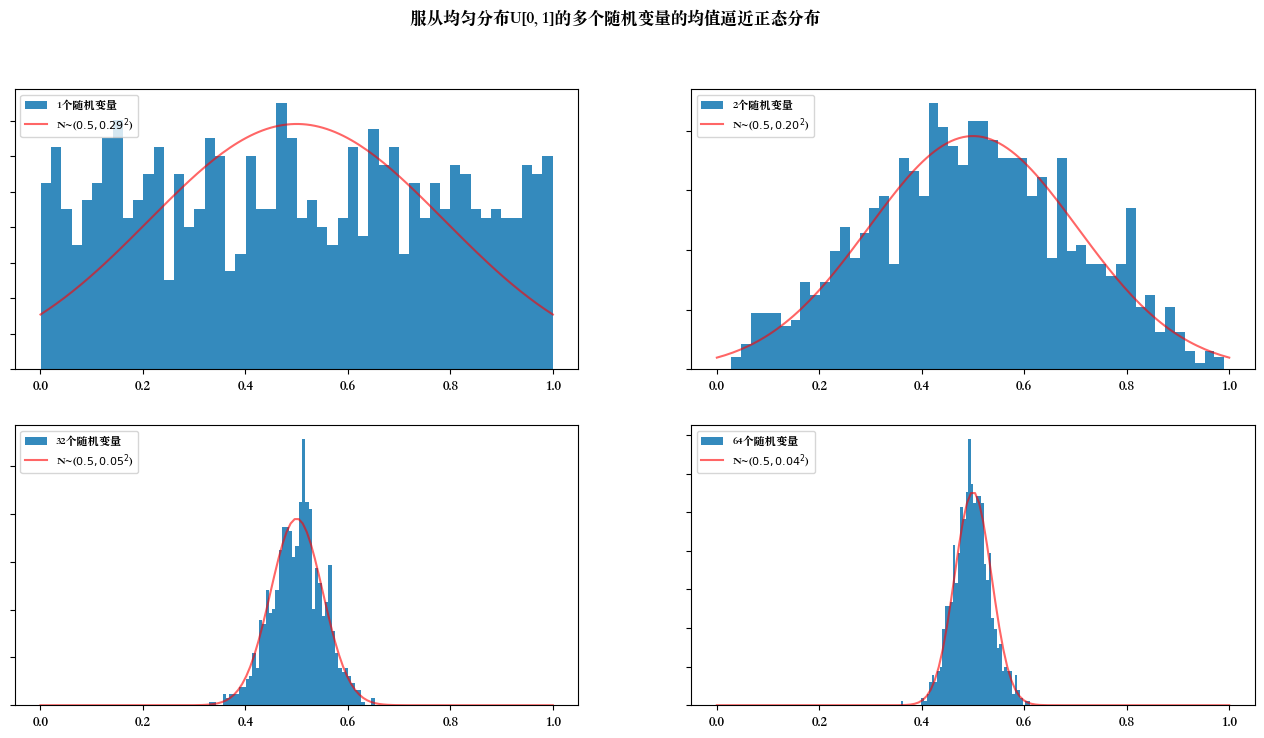

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

# macOs 中文
plt.rcParams['font.family'] = ['Songti SC', 'Gill Sans']
# windows 中文
# plt.rcParams['font.family'] = ['Microsoft YaHei']

f = plt.figure(figsize=(16, 8))  # type: plt.Figure

# [0, 1] 均匀分布
a, b = 0, 1
mean, var = (a + b) / 2, (b - a) ** 2 / 12

# 采样个数
sample_nums = 1000


def p_norm(nvr):
    """
    nvr 个相互独立变量的正态图像
    :param nvr: 
    :return: 
    """
    mu = mean
    sigma = np.sqrt(var / nvr)
    # 正态分布
    norm_dis = stats.norm(mu, sigma)

    norm_x = np.linspace(a, b, 128)
    pdf = norm_dis.pdf(norm_x)

    plt.plot(norm_x, pdf, 'r', alpha=0.6, label=f'N~(${mu:.1f}, {sigma:.2f}^2$)')
    plt.legend(loc='upper left', prop={'size': 8})


def sample(rv_num):
    # 对随机变量 X1 --- Xn 进行抽样
    # 0-1 均匀分布
    single_sample_dist = stats.uniform(loc=a, scale=b)

    x = 0
    for j in range(rv_num):
        x += single_sample_dist.rvs()

    x *= 1 / rv_num
    return x


def plot_hist(rv_num, n):
    """
    
    :param rv_num: 随机变量个数
    :param n: 
    :return: 
    """
    sp = f.add_subplot(2, 2, n)
    x = np.array([sample(rv_num) for _ in range(sample_nums)])
    # 画出直方图
    plt.hist(x, 50, density=True, color='#348ABD', label=f'{rv_num}个随机变量')
    plt.setp(sp.get_yticklabels(), visible=False)

    # 正态分布曲线
    p_norm(rv_num)


nvr = ([1, 2, 32, 64])
for i in range(np.size(nvr)):
    plot_hist(nvr[i], i + 1)

plt.suptitle("服从均匀分布U[0, 1]的多个随机变量的均值逼近正态分布")


### b. 假设有n个随机变量X1，Xa，⋯，X，相互独立并且服从入=2，的泊松分布，利用中心极限定理，验证这些随机变量的均值的分布满足正态分布。并给出正态分布的均值和方差。

Text(0.5, 0.98, '服从$\\lambda = 2$ 泊送分布的多个相互独立变量的均值逼近正态分布')

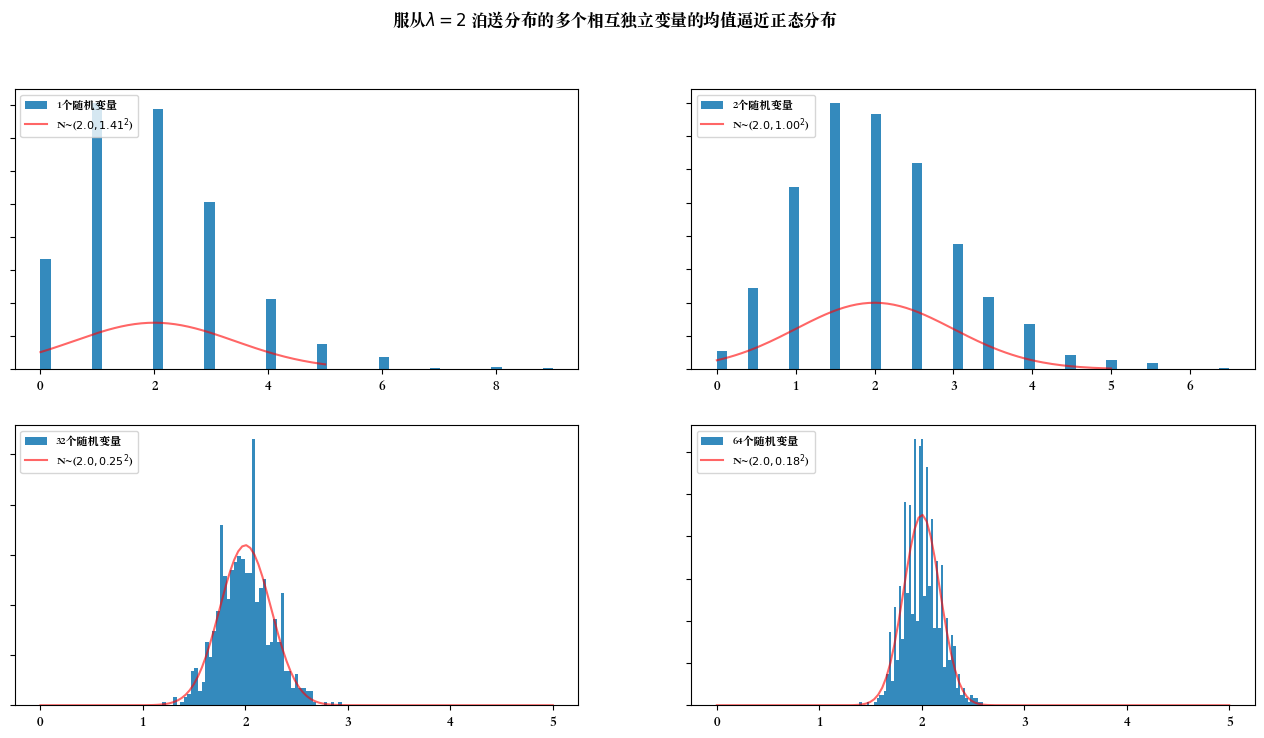

In [26]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

# macOs 中文
plt.rcParams['font.family'] = ['Songti SC', 'Gill Sans']
# windows 中文
# plt.rcParams['font.family'] = ['Microsoft YaHei']

f = plt.figure(figsize=(16, 8))  # type: plt.Figure

norm_mu, norm_var = 2, 2

# 采样个数
sample_nums = 1000


def p_norm(nvr):
    mu = norm_mu
    sigma = np.sqrt(norm_var / nvr)
    norm_x = np.linspace(0, 5, 128)
    # 正态分布
    norm_dis = stats.norm(mu, sigma)
    pdf = norm_dis.pdf(norm_x)
    plt.plot(norm_x, pdf, 'r', alpha=0.6, label=f'N~(${mu:.1f}, {sigma:.2f}^2$)')

    plt.legend(loc='upper left', prop={'size': 8})


def sample(rv_num):
    # 对随机变量 X1 --- Xn 进行抽样
    # 柏松分布
    mean = 2

    x = 0
    for j in range(rv_num):
        x += stats.poisson.rvs(mean)

    x *= 1 / rv_num
    return x


def plot_hist(rv_num, n):
    """
    
    :param rv_num: 随机变量个数
    :param n: 
    :return: 
    """
    x = np.zeros((sample_nums,))
    sp = f.add_subplot(2, 2, n)
    x = np.array([sample(rv_num) for _ in range(sample_nums)])
    # 画出直方图
    plt.hist(x, 50, density=True, color='#348ABD', label=f'{rv_num}个随机变量')
    plt.setp(sp.get_yticklabels(), visible=False)

    # 正态分布曲线
    p_norm(rv_num)


nvr = ([1, 2, 32, 64])
for i in range(np.size(nvr)):
    plot_hist(nvr[i], i + 1)

plt.suptitle("服从$\lambda = 2$ 泊送分布的多个相互独立变量的均值逼近正态分布")


## 7.2 最大似然估计求解模型参数

### 根据数据集中搜集到的样本数，利用最大似然法估计总体分布的模型参数

mu = 18.218934644422767


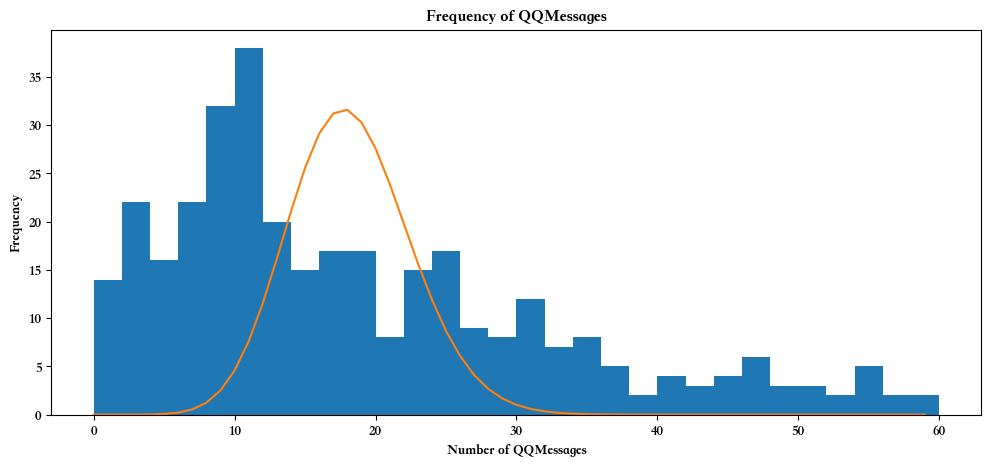

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as opt

filename = './data/QQ_data.csv'
messages = pd.read_csv(filename)
y_obs = messages['numbers'].values

np.seterr(invalid='ignore')


def poisson_log_prob(mu, sign=-1):
    # 根据泊松模型和参数值返回观测数据的总似然值
    return np.sum(sign * stats.poisson.logpmf(y_obs, mu=mu))


fig = plt.figure(figsize=(12, 5))  # type: plt.Figure
plt.title('Frequency of QQMessages')
plt.xlabel('Number of QQMessages')
plt.ylabel('Frequency')
plt.hist(y_obs, range=(0, 60), bins=30, histtype='stepfilled')

freq_results = opt.minimize_scalar(poisson_log_prob)
# 泊松分布的 mu
mu = freq_results['x']
print(f'mu = {mu}')

# 画泊松分布图像
x = range(0, 60)
plt.plot(x, stats.poisson(mu).pmf(x) * len(y_obs))

## 7.3 朴素贝叶斯进行用户满意度测试 

### 根据汽车的属性（买入价、维护费、车门数、可容纳人数、后备箱大小、安全性），测评用户满意度（不可接受，可接受，好，非常好）

In [28]:
import pandas
from sklearn.naive_bayes import BernoulliNB

data = pandas.read_table("./data/car.txt",
                         names=['买入价', '维护费', '车门数', '可容纳人数', '后备箱大小', '安全性', '满意度'], sep=',')

# 数据清理
price_map = {
    'vhigh': 4,
    'high': 3,
    'med': 2,
    'low': 1
}
door_map = {
    '2': 2,
    '3': 3,
    '4': 4,
    '5more': 5
}
capacity = {
    'small': 1,
    'med': 2,
    'big': 3
}
safe = {
    'low': 1,
    'med': 2,
    'high': 3
}
person = {
    '2': 1,
    '4': 2,
    'more': 3
}
acc = {
    'unacc': 1,
    'acc': 2,
    'good': 3,
    'vgood': 4
}
data['买入价'] = data['买入价'].apply(lambda x: price_map[x])
data['维护费'] = data['维护费'].apply(lambda x: price_map[x])
data['可容纳人数'] = data['可容纳人数'].apply(lambda x: person[x])
data['车门数'] = data['车门数'].apply(lambda x: 5 if x == '5more' else int(x))
data['后备箱大小'] = data['后备箱大小'].apply(lambda x: capacity[x])
data['安全性'] = data['安全性'].apply(lambda x: safe[x])

train_data, test_data = data.iloc[:1600, :], data.iloc[1600:, :]
X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1]

# 朴素贝利叶
clf = BernoulliNB()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
# 正确率
np.mean(predicted == y_test)

0.546875

# 八、数据的空间变换

## 8.1 常用核函数的实现

### 在python中实现以下常用的三种核函数，并计算X = [1,2,3,4], Y = [5,6,7,8]分别使用不同核函数计算的结果。

In [29]:
import numpy as np

x = np.array([1, 2, 3, 4])
y = np.array([5, 6, 7, 8])


def linear(X: np.ndarray, Y: np.ndarray):
    """
    线性核函数
    :param X: 
    :param Y: 
    :return: 
    """
    return X @ Y.T


def gaussian(X: np.ndarray, Y: np.ndarray, sigma: float):
    """
    高斯核函数
    :param X: 
    :param Y: 
    :param sigma: 
    :return: 
    """
    return np.exp(-np.linalg.norm(X - Y) ** 2 / (2 * sigma ** 2))


def poly(X: np.ndarray, Y: np.ndarray, gamma: float, c: float, degree: float):
    """
    多项式核函数
    :param X: 
    :param Y: 
    :param gamma: 倍数
    :param c: 偏差
    :param degree: 维度 
    :return: 
    """
    ret = X @ Y.T
    return (ret * gamma + c) ** degree


f'线性核函数: {linear(x, y)}    高斯核函数: {gaussian(x, y, 4)}    多项式核函数: {poly(x, x, 1, 0, 1)}'

'线性核函数: 70    高斯核函数: 0.1353352832366127    多项式核函数: 30'

## 8.2 线性可分 SVM 实现

### 训练数据集：正样点：（4,3）（3,3）负样点：（1,1）利用SVC对测试集（4,5）（0,0），（1,3）进行预测

In [30]:
from sklearn.svm import SVC, NuSVC, LinearSVC

X = np.array([[4, 3], [3, 3], [1, 1]])
y = np.array([1, 1, -1])

# C: 惩罚系数
# kernel: 核函数, 默认高斯
model = SVC(kernel='linear')
model.fit(X, y)

model.predict(np.array([[4, 5], [0, 0], [1, 3]]))

w = model.coef_[0]
a = -w[0] / w[1]
print("支持向量：\n", model.support_vectors_)  #输出支持向量
print("支持向量的标号：", model.support_)  #输出支持向量的标号
print("每类支持向量的个数：", model.n_support_)  # 每类支持向量的个数
print("数据集X到分类超平面的距离：", model.decision_function(X))
print("参数(法向量) w=", w)
print("分类线的斜率 a=", a)
print("分类平面截距 b：", model.intercept_)  #超平面的截距值(常数值)
print("系数", model.coef_)  # 每个特征系数(重要性)，只有 Linearsvc 核两数可用

支持向量：
 [[1. 1.]
 [3. 3.]]
支持向量的标号： [2 1]
每类支持向量的个数： [1 1]
数据集X到分类超平面的距离： [ 1.5  1.  -1. ]
参数(法向量) w= [0.5 0.5]
分类线的斜率 a= -1.0
分类平面截距 b： [-2.]
系数 [[0.5 0.5]]


## 8.3 分线性 SVM 实现

### 随机生成如图所示的两类数据，构造三种核函数（线性、多项式、高斯）的算法拟合数据集，并画出拟合的分类超平面

([], [])

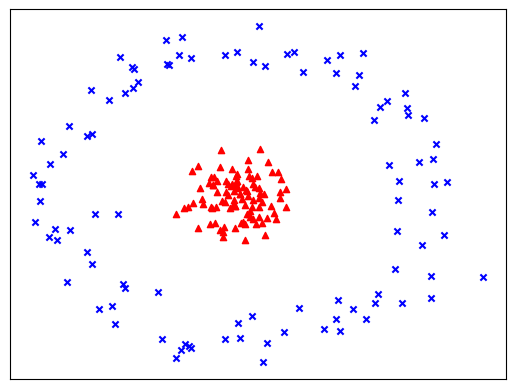

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# macOs 中文
plt.rcParams['font.family'] = ['Songti SC', 'Gill Sans']


# windows 中文
# plt.rcParams['font.family'] = ['Microsoft YaHei']


def plot_decision_boundary(plt: plt.Axes, model: SVC, X: np.ndarray, y: np.ndarray, h=0.03, draw_SV=True,
                           title='精度范围'):
    # 各个维度数据的最大最小值
    X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # 坐标矩阵
    xx, yy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(y_min, y_max, h))  # type: np.ndarray, np.ndarray

    label_predict = model.predict(np.stack((xx.flat, yy.flat), axis=1))  # type: np.ndarray
    label_predict = label_predict.reshape(xx.shape)

    # plt.set_title(title)
    # plt.xlim(xx.min(), xx.max())
    # plt.ylim(yy.min(), yy.max())
    # plt.xticks()
    # plt.yticks()

    plt.contourf(xx, yy, label_predict, alpha=0.5)

    markers = ['x', '^', 'o']
    colors = ['b', 'r', 'c']

    classes = np.unique(y)

    for label in classes:
        plt.scatter(X[y == label][:, 0], X[y == label][:, 1], c=colors[label], s=60, marker=markers[label])

    if draw_SV:
        SV = model.support_vectors_
        n = model.n_support_[0]
        plt.scatter(SV[:n, 0], SV[:n, 1], s=15, c='black', marker='o')
        plt.scatter(SV[n:, 0], SV[n:, 1], s=15, c='g', marker='o')


# 产生样本点
X, y = make_circles(200, factor=0.1, noise=0.1)  # type: np.ndarray, np.ndarray

plt.scatter(X[y == 0, 0], X[y == 0, 1], c='b', s=20, marker='x')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='r', s=20, marker='^')
plt.xticks(())
plt.yticks(())

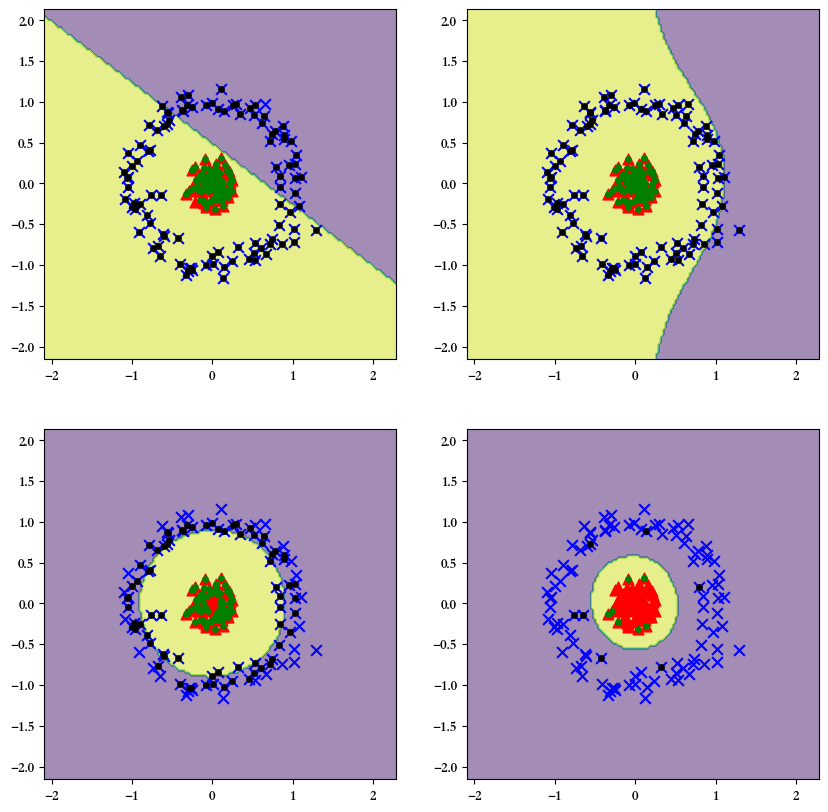

In [32]:
# 线性核函数
model_liner = SVC(C=1.0, kernel='linear')
model_liner.fit(X, y)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # type: plt.Figure, list[list[plt.Axes]]

plot_decision_boundary(axes[0][0], model_liner, X, y, title='线性核函数')

# 多项式核函数
model_poly = SVC(C=1.0, kernel='poly', degree=3, gamma='auto')
model_poly.fit(X, y)
plot_decision_boundary(axes[0][1], model_poly, X, y, title='3维多项式核函数')

model_poly = SVC(C=1.0, kernel='poly', degree=4, gamma='auto')
model_poly.fit(X, y)
plot_decision_boundary(axes[1][0], model_poly, X, y, title='4维多项式核函数')

# 高斯核函数
model_gaussian = SVC(C=1.0)
model_gaussian.fit(X, y)
plot_decision_boundary(axes[1][1], model_gaussian, X, y, title='高斯核函数')

## 8.4 非线性 SVM 实现

### 对下图中的数据进行SVM分类

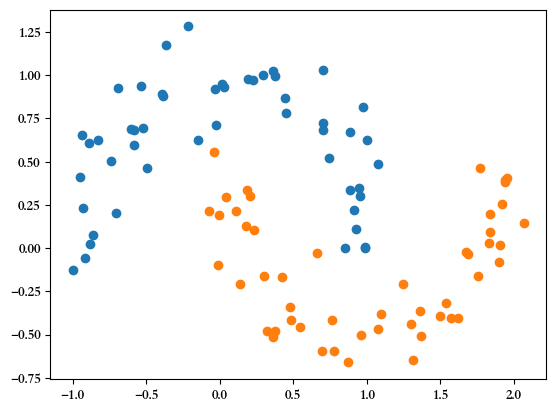

In [33]:
from data.svm_data import SVM_data

X = SVM_data
y = np.array(
    [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
     1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

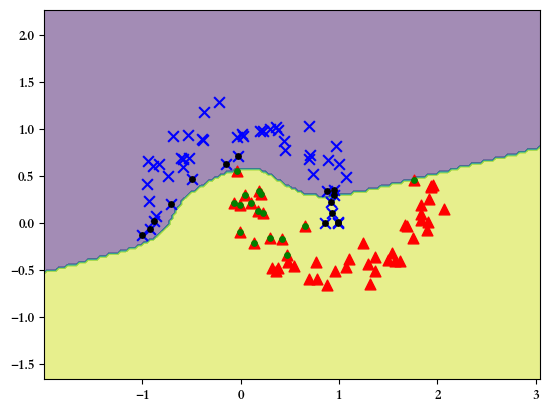

In [34]:
model_poly_2 = SVC(C=1.2, kernel='poly', degree=5, gamma=2)
model_poly_2.fit(X, y)
plot_decision_boundary(plt, model_poly_2, X, y)

# 九、熵与激活函数
## 9.1 熵和信息熵的python实现

### 在python中实现不同均匀分布概率下信息熵与概率的关系，并画图显示。均匀分布概率分别为 \[0.01,0.02，...，0.99]

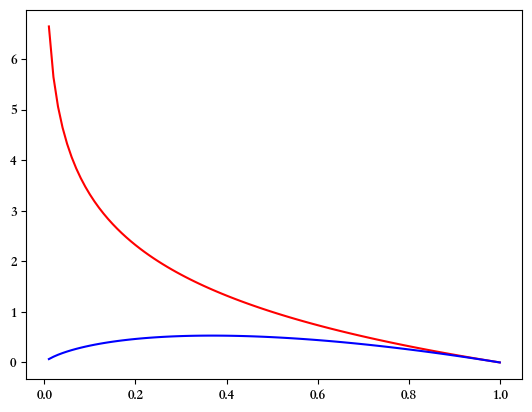

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 分布概率
X = np.linspace(0.01, 1, 100)  # type: np.ndarray
# 概率负对数
y = -np.log2(X)
# 熵
y1 = X * y

plt.plot(X, y, color='r')
plt.plot(X, y1, color='b')

## 9.2 常见激活函数的python实现
### 实现Sigmoid函数及其导数，并画图显示

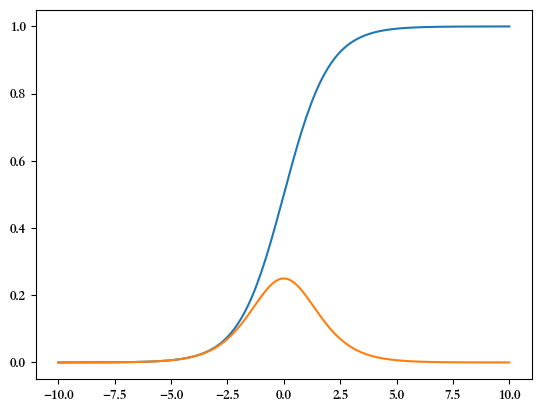

In [36]:
X = np.linspace(-10, 10, 201, endpoint=True)  # type: np.ndarray


def sigmoid(X: np.ndarray):
    return 1 / (1 + np.exp(-X))


y = sigmoid(X)
# 导数
dy = y * (1 - y)

plt.plot(X, y)
plt.plot(X, dy)

## 9.3 ID3分类算法的 python 实现
### 使用ID3分类算法对以下数据进行分类

In [37]:
import pandas as pd

# Outlook
SUNNY = 'Sunny'
OVERCAST = 'Overcast'
RAIN = 'Rain'

# Temp
HOT = 'Hot'
MILD = 'Mild'
COOL = 'Cool'

# Humidity
HIGH = 'High'
NORMAL = 'Normal'

# Wind
WEAK = 'Weak'
STRONG = 'Strong'

data = pd.DataFrame([
    [SUNNY, HOT, HIGH, WEAK, 0],
    [SUNNY, HOT, HIGH, STRONG, 0],
    [OVERCAST, HOT, HIGH, WEAK, 1],
    [RAIN, MILD, HIGH, WEAK, 1],
    [RAIN, COOL, NORMAL, WEAK, 1],
    [RAIN, COOL, NORMAL, STRONG, 0],
    [OVERCAST, COOL, NORMAL, STRONG, 1],
    [SUNNY, MILD, HIGH, WEAK, 0],
    [SUNNY, COOL, NORMAL, WEAK, 1],
    [RAIN, MILD, NORMAL, WEAK, 1],
    [SUNNY, MILD, NORMAL, STRONG, 1],
    [OVERCAST, MILD, HIGH, STRONG, 1],
    [OVERCAST, HOT, NORMAL, WEAK, 1],
    [RAIN, MILD, HIGH, STRONG, 0]
], columns=['Outlook', 'Temp', 'Humidity', 'Wind', 'Decision'])

In [38]:
# ID3
import numpy as np
import pandas as pd

all_data = data
target_data = all_data['Decision']  # type: pd.Series
train_data = all_data.iloc[:, :-1]  # type: pd.DataFrame


def split_dataset(dataset: pd.DataFrame, axis, value) -> pd.DataFrame:
    """
    根据特征划分数据，同时删除改特征列，只保留划分后的数据
    :param dataset: 数据集
    :param axis: 轴
    :param value: 划分值
    :return: 划分的数据集合
    """
    split_data = dataset[dataset[axis] == value]  # type: pd.DataFrame
    # 使用 Pandas 重建一个没有特征列的 DataFrame
    split_data = split_data.drop(axis, axis=1)
    return split_data


def prob_by_axis(dataset: pd.DataFrame, axis):
    """
    计算给定维度的可能值
    :param dataset:
    :param axis:
    :return:
    """
    group_data = dataset.groupby(axis)[axis]

    value_counts = group_data.value_counts()
    _sum = value_counts.sum()

    _prob = value_counts / _sum  # type: pd.DataFrame
    return _prob


def calc_shanon_ent(dataset: pd.DataFrame, axis):
    """
    计算信息熵
    :param dataset: 数据集
    :return:
    """
    prob = prob_by_axis(dataset, axis)  # type: pd.DataFrame
    entropy = - prob * np.log2(prob)  # type: pd.DataFrame
    entropy_total = entropy.sum()
    return entropy_total


def calc_conditional_ent(dataset: pd.DataFrame, axis, uniqueVals):
    """
    计算条件熵
    :param dataset:
    :param axis: 维度，特征名称
    :param uniqueVals: 数据集特征集合
    :return:
    """
    ce = 0.0
    entropy = calc_shanon_ent(dataset, axis)
    for value in uniqueVals:
        sub_dataset = split_dataset(dataset, axis, value)
        prob = len(sub_dataset) / float(len(dataset))
        ce += prob * entropy
    return ce


def calc_information_gain(dataset: pd.DataFrame, base_entropy, axis):
    """
    计算信息增量
    :param dataset:
    :param base_entropy:
    :param axis:
    :return:
    """
    unique_values = dataset[axis].unique()
    new_entropy = calc_conditional_ent(dataset, axis, uniqueVals=unique_values)

    return base_entropy - new_entropy


def best_feat_get_sub_dataset(dataset: pd.DataFrame, deep):
    """
    算法框架
    :param deep: 
    :param dataset:
    :return:
    """
    first_column = dataset.columns[0]
    base_entropy = calc_shanon_ent(dataset, first_column)

    entropies = {first_column: base_entropy}
    for column in dataset.columns[1:]:
        info_gain = calc_information_gain(dataset, base_entropy, column)
        entropies[column] = info_gain
    max_feature = max(entropies)
    table_str = "\t" * deep
    print(f'{table_str}最大熵增益[{max_feature}]: {entropies}')
    return max_feature


def majority_cnt(classes: np.ndarray):
    """
    特征若已经划分完，节点下的样本还没有统一取值，进行投票
    :param classes:
    :return:
    """
    class_count = {}
    for vote in classes:
        if vote not in class_count.keys():
            class_count[vote] = 0
        class_count[vote] += 1
    return max(class_count)

In [39]:
def create_tree(dataset, feature_names, chooseBestFeatureToSplitFunc=best_feat_get_sub_dataset, deep=0):
    # 类别列表
    classes = dataset.iloc[:, -1]
    if len(classes.value_counts()) == len(classes):
        return classes.iloc[0]

    if len(dataset.iloc[:, 0]) == 1:
        return majority_cnt(classes)

    best_feat = chooseBestFeatureToSplitFunc(dataset=dataset, deep=deep)
    my_tree = {best_feat: {}}
    if best_feat in feature_names:
        feature_names.remove(best_feat)
        feat_values = dataset[best_feat]
        unique_values = set(feat_values)
        for value in unique_values:
            sub_label = feature_names[:]
            table_str = '\t' * deep
            print(f"{table_str}{best_feat} = {value}")
            my_tree[best_feat][value] = create_tree(split_dataset(dataset, best_feat, value), sub_label, deep=deep + 1)
    return my_tree


feat_names = train_data.columns.to_numpy().tolist()
my_tree = create_tree(train_data, feat_names, deep=0)
print(my_tree)

最大熵增益[Wind]: {'Outlook': 1.5774062828523454, 'Temp': 0.0207495753895226, 'Humidity': 0.5774062828523454, 'Wind': 0.5921781468180939}
Wind = Weak
	最大熵增益[Temp]: {'Outlook': 1.561278124459133, 'Temp': 0.0, 'Humidity': 0.5612781244591329}
	Temp = Hot
		最大熵增益[Outlook]: {'Outlook': 0.9182958340544896, 'Humidity': 0.0}
		Outlook = Sunny
		Outlook = Overcast
	Temp = Mild
		最大熵增益[Outlook]: {'Outlook': 0.9182958340544896, 'Humidity': 0.0}
		Outlook = Sunny
		Outlook = Rain
	Temp = Cool
		最大熵增益[Outlook]: {'Outlook': 1.0, 'Humidity': 1.0}
		Outlook = Sunny
		Outlook = Rain
Wind = Strong
	最大熵增益[Temp]: {'Outlook': 1.584962500721156, 'Temp': 0.1258145836939113, 'Humidity': 0.5849625007211561}
	Temp = Hot
	Temp = Mild
		最大熵增益[Outlook]: {'Outlook': 1.584962500721156, 'Humidity': 0.6666666666666665}
		Outlook = Sunny
		Outlook = Rain
		Outlook = Overcast
	Temp = Cool
		最大熵增益[Outlook]: {'Outlook': 1.0, 'Humidity': 1.0}
		Outlook = Rain
		Outlook = Overcast
{'Wind': {'Weak': {'Temp': {'Hot': {'Outlook': {

# 十、假设检验
## 10.1 体检数据中的假设性检验问题

### 数据集中包含多个人的体温、性别和心率数据，试检验：
* 体温的分布是否服从正态分布（正态性检验）
* 人类的平均体温是98.6 （单总体T检验）
* 男性和女性的体温有差异吗？（两独立样本T检验<--方差齐性检验）

#### 1). 读取数据

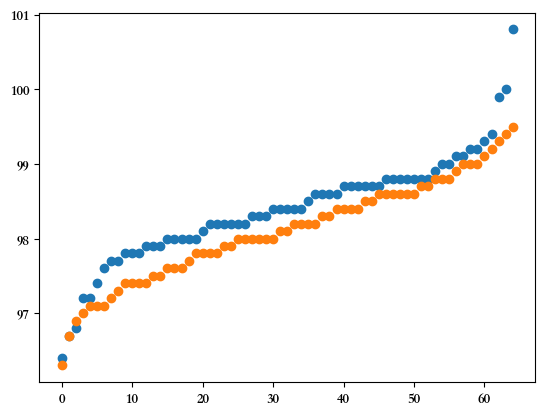

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据，按空格分割
data = pd.read_csv('./data/normtemp.txt', sep='\s+', names=['Temperature', 'Gender', 'HeartRate'])

# 所有体温
all_temp = data['Temperature']
# 女性体温
female_temp = data['Temperature'][data.Gender == 2]
# 男性体温
male_temp = data['Temperature'][data.Gender == 1]

plt.scatter(np.arange(len(female_temp)), female_temp)
plt.scatter(np.arange(len(male_temp)), male_temp)

#### 2). 数据展示
可以看到数据整体大概是满足正态分布的。

(96.0, 100.0)

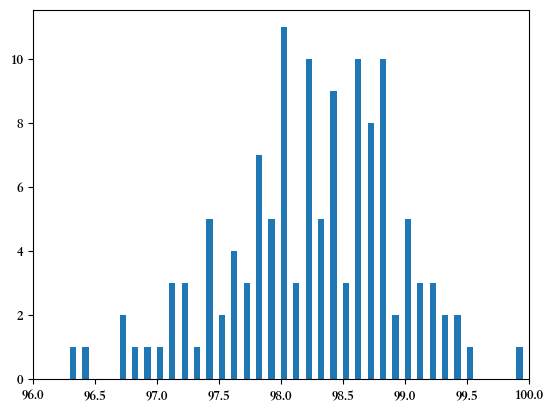

In [41]:
plt.hist(all_temp, bins=np.arange(95, 100, step=0.05))

plt.xlim(96, 100)

#### 3). 利用 scipy 库进行正态性检验

两种方式的 p 值都大于 0.05，故认为体温服从正态分布。

In [42]:
# 正态检验
from scipy.stats import shapiro, normaltest

shapiro(all_temp), normaltest(all_temp)

(ShapiroResult(statistic=0.9865768551826477, pvalue=0.2331615388393402),
 NormaltestResult(statistic=2.703801433319236, pvalue=0.2587479863488212))

#### 4). 单总体 T 检验

H0: 98.6 是人类体温的均值

p-value = 2.410632041561008e-07 < 0.05, 即拒绝原假设，平均体温不是98.6
p-value = 0.9904741482214944 > 0.05, 即接受原假设，平均体温是98.25


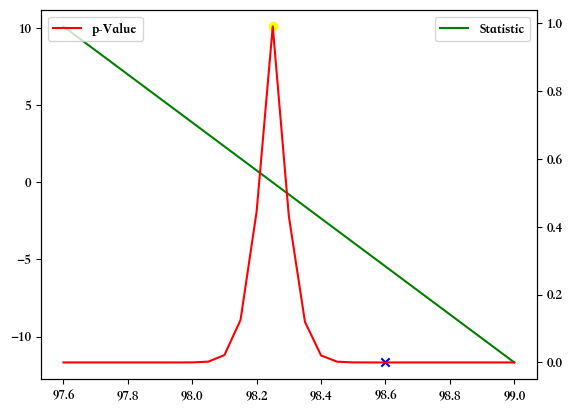

In [43]:
from scipy.stats import ttest_1samp

mu = 98.6

mus = np.arange(97.6, 99, 0.05)
tests_stats = [ttest_1samp(all_temp, mu).statistic for mu in mus]
tests_p_values = [ttest_1samp(all_temp, mu).pvalue for mu in mus]

_, ax = plt.subplots()  # type: plt.Axes

ax.plot(mus, tests_stats, 'g', label='Statistic')
n_ax = ax.twinx()  # type: plt.Axes
n_ax.plot(mus, tests_p_values, 'r', label='p-Value')

n_ax.scatter(98.6, ttest_1samp(all_temp, 98.6).pvalue, color='blue', marker='x')
n_ax.scatter(98.25, ttest_1samp(all_temp, 98.25).pvalue, color='yellow', marker='o')

ax.legend()
n_ax.legend(loc=2)

ret = ttest_1samp(all_temp, mu)
if ret.pvalue < 0.05:
    print(f"p-value = {ret.pvalue} < 0.05, 即拒绝原假设，平均体温不是{mu}")
else:
    print(f"p-value = {ret.pvalue} > 0.05, 即接受原假设，平均体温是{mu}")

mu = 98.25
ret = ttest_1samp(all_temp, mu)
if ret.pvalue < 0.05:
    print(f"p-value = {ret.pvalue} < 0.05, 即拒绝原假设，平均体温不是{mu}")
else:
    print(f"p-value = {ret.pvalue} > 0.05, 即接受原假设，平均体温是{mu}")

#### 5). 两独立样本 T 检验

H0: 没有差异，H1: 有差异

In [44]:
from scipy.stats import ttest_ind

ret = ttest_ind(female_temp, male_temp)

if ret.pvalue < 0.05:
    print(f"p-value = {ret.pvalue} < 0.05, 即拒绝原假设，男女体温有差异")
else:
    print(f"p-value = {ret.pvalue} > 0.05, 即接受原假设，男女体温没有差异")

p-value = 0.023931883122402346 < 0.05, 即拒绝原假设，男女体温有差异


## 10.2 卡方检验

### 种族对求职是否有影响

#### 1). 读取数据

In [45]:
from pandas.io.stata import read_stata
from scipy.stats import chisquare

# 保留人种、是否录用两列
data = read_stata('./data/us_job_market_discrimination.dta')[['race', 'call']]  # type: pd.DataFrame

data

,race,call
0,w,0.0
1,w,0.0
2,b,0.0
3,b,0.0
4,w,0.0
...,...,...
4865,b,0.0
4866,b,0.0
4867,w,0.0
4868,b,0.0


#### 2). 计算理论值

In [46]:
# 根据 race, call 分组
tmp = data[['race', 'call']].groupby(['race', 'call']).value_counts().unstack()  # type: pd.DataFrame
# 期望
expect = pd.DataFrame(tmp.mean(axis=0).values.reshape(-1, 1).repeat(2, axis=1).T, index=['w', 'b'],
                      columns=['not called', 'called'])

expect

,not called,called
w,2239.0,196.0
b,2239.0,196.0


#### 3). 卡方检验

H0: 卡方：对种族没有影响，即现实和预期（没有歧视）卡方较相关。

In [47]:
ret_flat = tmp.to_numpy().reshape(-1, 1).astype(float)
expect_flat = expect.to_numpy().reshape(-1, 1)

ret = chisquare(f_obs=ret_flat, f_exp=expect_flat)
if ret.pvalue < 0.05:
    print(f"p-value = {ret.pvalue} < 0.05, 即拒绝原假设，存在歧视")
else:
    print(f"p-value = {ret.pvalue} > 0.05, 即接受原假设，不存在歧视")

p-value = [0.0007484] < 0.05, 即拒绝原假设，存在歧视


## 习题

### a. 在10块地同时试种甲、乙两种作物, 其产量均服从正态分布,且方差相同。结果计算得 $\bar{X} = 30.97, \bar{Y} = 21.79, S_{x} = 26.7, S_{y} = 12.1$。问这两种产品的产量有无显著的差异?

H0: 不存在

In [48]:
from scipy.stats import ttest_ind_from_stats

n = 10
x_bar = 30.97
y_bar = 21.79
sx = 26.7
sy = 12.1
# 样本1期望，样本1标准差，样本1数量，样本2期望，样本2标准差，样本2数量
ret = ttest_ind_from_stats(x_bar, sx, n, y_bar, sy, n)

if ret.pvalue < 0.05:
    print(f"p-value = {ret.pvalue} < 0.05, 即拒绝原假设，产量有差异")
else:
    print(f"p-value = {ret.pvalue} > 0.05, 即接受原假设，产量没有差异")

p-value = 0.33515010412587487 > 0.05, 即接受原假设，产量没有差异


### b. 从某中学随机抽取两个班，调查他们对待文理分科的态度，结果，甲班37人赞成，27人反对；乙班39人赞成，21人反对，试问这两个班对待文理分科的态度是否有显著差异？

因为总体分布未知，可以用非参数检验即卡方检验。

In [49]:
# 甲赞，甲反，乙赞，乙反
sample = [37, 27, 39, 21]
mean1, mean2 = (sample[0] + sample[2]) / 2, (sample[1] + sample[3]) / 2
# 期望:  甲赞，甲反，乙赞，乙反
mean_target = [mean1, mean2, mean1, mean2]

ret = chisquare(f_obs=sample, f_exp=mean_target)
if ret.pvalue < 0.05:
    print(f"p-value = {ret.pvalue} < 0.05, 即拒绝原假设，态度存在差异")
else:
    print(f"p-value = {ret.pvalue} > 0.05, 即接受原假设，态度不存在差异")

p-value = 0.8488374913896951 > 0.05, 即接受原假设，态度不存在差异


# 十一、相关分析

## 11.1 皮尔森相关系数及假设检验

### 下表显示的是伦敦的月平均气温和降水量之间的对比，计算月平均气温和降雨量之间的皮尔森相关系数，并对其进行假设检验。要求分别用公式和python调用库函数进行计算。

In [50]:
import numpy as np

tang = np.array([
    [3.8, 4, 5.8, 8, 11.3, 14.4, 16.5, 16.2, 13.8, 10.8, 6.7, 4.7],
    [77.7, 51.2, 60.1, 54.1, 55.4, 56.8, 45, 55.3, 67.5, 73.3, 76.6, 79.6]
])

tang

array([[ 3.8,  4. ,  5.8,  8. , 11.3, 14.4, 16.5, 16.2, 13.8, 10.8,  6.7,
         4.7],
       [77.7, 51.2, 60.1, 54.1, 55.4, 56.8, 45. , 55.3, 67.5, 73.3, 76.6,
        79.6]])

#### 1). 公式法

In [51]:
mean = tang.mean(axis=1).reshape((-1, 1))  # type: np.ndarray

# 样本值 减 目标值
dt_tang = tang - mean

r = np.sum(dt_tang[0] * dt_tang[1]) / (np.sqrt(np.sum((dt_tang[0]) ** 2)) * np.sqrt(np.sum((dt_tang[1]) ** 2)))

t = r * np.sqrt((tang.shape[1] - 2) / (1 - r ** 2))
r, t

(-0.4894946761511898, -1.775122616469848)

#### 2). 调用库法

In [52]:
from scipy.stats import pearsonr

pearsonr(tang[0], tang[1])

PearsonRResult(statistic=-0.4894946761511897, pvalue=0.10626538135989474)

## 11.2 斯皮尔曼等级相关及假设检验

### 下表给定两组数据，计算Xi和Yi之间的斯皮尔曼相关系数，并对其进行假设检验。要求分别用公式和python调用库函数进行计算。

In [53]:
pearsonr_data = np.array([
    [106, 86, 100, 101, 99, 103, 97, 113, 112, 110],
    [7, 0, 27, 50, 28, 29, 20, 12, 6, 17]
])

# 计算排名
pearsonr_rank_data = stats.rankdata(pearsonr_data, axis=1)

#### 1). 公式法

In [54]:
# 公式法
n = pearsonr_rank_data.shape[1]
d = pearsonr_rank_data[0] - pearsonr_rank_data[1]

r = 1 - (6 * np.sum(d ** 2)) / (n ** 3 - n)

t = r * np.sqrt((n - 2) / (1 - r ** 2))
r, t

(-0.17575757575757578, -0.5049782491758347)

#### 2). 调用库函数法

In [55]:
from scipy.stats import spearmanr

# 调用
spearmanr(pearsonr_rank_data[0], pearsonr_rank_data[1])

SignificanceResult(statistic=-0.17575757575757575, pvalue=0.6271883447764844)

## 11.3 肯德尔系数及假设检验

### a. 同一评价者无相同等级评定

下表给定6位教师对6篇论文的评定等级，6位教师评定结果的肯德尔系数，并对其进行假设检验。要求分别用公式和python调用库函数进行计算。

In [56]:
data = np.array([
    [3, 1, 2, 5, 4, 6],
    [2, 1, 3, 4, 5, 6],
    [3, 2, 1, 5, 4, 6],
    [4, 1, 2, 6, 3, 5],
    [3, 1, 2, 6, 4, 5],
    [4, 2, 1, 5, 3, 6]
])  # type: np.ndarray

#### 1). 公式法

In [57]:
N = 6
K = 6
Ri = np.sum(data, axis=0)
S = np.sum(Ri ** 2) - np.sum(Ri) ** 2 / N
W = (12 * S) / (K ** 2 * (N ** 3 - N))

# W = 0.866666... 说明具有较大的一致性
S, W

(546.0, 0.8666666666666667)

#### 2). 调用库函数法

In [58]:
from scipy.stats import kendalltau

ret = np.zeros((K, K))
for i in range(0, K):
    for j in range(0, K):
        # 两两求
        ret[i, j], _ = kendalltau(data[:, i], data[:, j])
pd.DataFrame(ret, index=['A', 'B', 'C', 'D', 'E', 'F'], columns=['A', 'B', 'C', 'D', 'E', 'F'])

,A,B,C,D,E,F
A,1.000000,0.319801,-0.545455,0.545455,-1.000000,-0.319801
B,0.319801,1.000000,-0.852803,-0.213201,-0.319801,0.500000
C,-0.545455,-0.852803,1.000000,-0.090909,0.545455,-0.213201
D,0.545455,-0.213201,-0.090909,1.000000,-0.545455,-0.852803
E,-1.000000,-0.319801,0.545455,-0.545455,1.000000,0.319801
F,-0.319801,0.500000,-0.213201,-0.852803,0.319801,1.000000


### b. 同一评价者有相同等级评定

下表给定3位教师对6篇论文的评定等级，6位教师评定结果的肯德尔系数，并对其进行假设检验。要求分别用公式和python调用库函数进行计算。

In [59]:
from scipy.stats import rankdata

data = np.array([
    [1, 4, 2.5, 5, 6, 2.5],
    [2, 3, 1, 5, 6, 4],
    [1.5, 3, 1.5, 4, 5.5, 5.5]
])  # type: np.ndarray
K = 3
N = 6
# 排序
data = rankdata(data, axis=1)  # type: np.ndarray
data

array([[1. , 4. , 2.5, 5. , 6. , 2.5],
       [2. , 3. , 1. , 5. , 6. , 4. ],
       [1.5, 3. , 1.5, 4. , 5.5, 5.5]])

#### 1). 公式法

In [60]:
N = 6
K = 3
Ri = np.sum(data, axis=0)
T = [2 ** 3 - 2, 0, (2 ** 3 - 2) + (2 ** 3 - 2)]
S = np.sum(Ri ** 2) - np.sum(Ri) ** 2 / N
W = (12 * S) / (K ** 2 * (N ** 3 - N) - K * np.sum(T))

# W = 0.849... 说明具有较大的一致性
S, W

(130.0, 0.8496732026143791)

#### 2). 调用库函数法

In [61]:
ret = np.zeros((K, K))
for i in range(0, K):
    for j in range(0, K):
        # 两两求
        ret[i, j], _ = kendalltau(data[:, i], data[:, j])
pd.DataFrame(ret, index=['甲', '乙', '丙'], columns=['甲', '乙', '丙'])

,甲,乙,丙
甲,1.000000,-0.816497,-1.000000
乙,-0.816497,1.000000,0.816497
丙,-1.000000,0.816497,1.000000


# 十二、回归分析

## 12.1 线性回归

### a. sklearn 线性回归

In [62]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([
    [35, 52, 60, 72, 85, 80, 95, 100, 105],
    [18, 25, 30, 38, 41, 44, 49, 52, 60]
])  # type: np.ndarray

(array([-3.37238874]), array([[0.56630336]]))

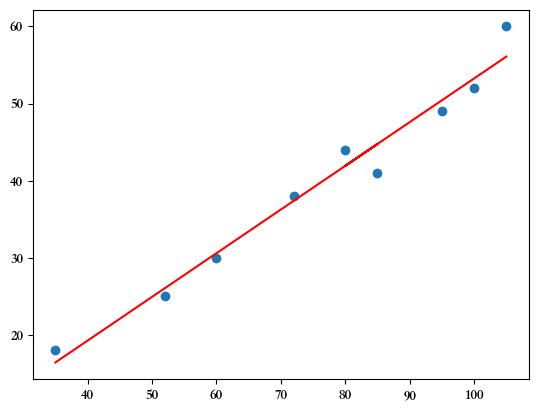

In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = data[0, :].reshape(-1, 1)  # type: np.ndarray
y = data[1, :].reshape(-1, 1)
model.fit(X, y)

plt.scatter(X, y)
y_t = model.coef_ * X + model.intercept_
plt.plot(X, y_t, color='r')

model.intercept_, model.coef_

### b. statsmodels 回归

(array([0.52539547]), array([0.52539547]))

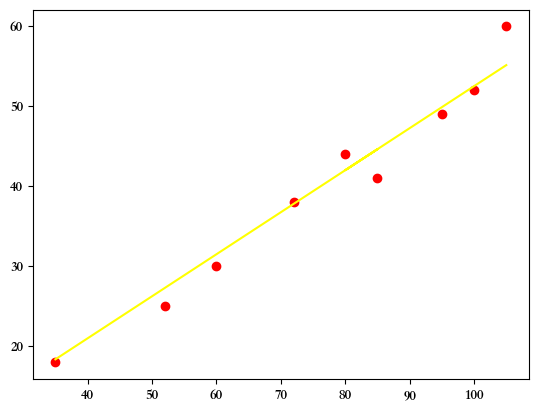

In [64]:
import statsmodels.api as sm

ols = sm.OLS(y, X)
model_ols = ols.fit()

plt.scatter(X, y, marker='o', color='r')
y_t1 = model_ols.params * X
plt.plot(X, y_t1, color='yellow')

model_ols.predict(1), model_ols.params

# 十三、方差分析

## 13.1 单因素方差分析

### 判断城市对用户评分是否有显著影响。

sklearn.stats.f_oneway

In [65]:
from scipy.stats import f_oneway
import scipy.stats as stats
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

cityA = [10, 9, 9, 8, 8, 7, 7, 8, 8, 9]
cityB = [10, 8, 9, 8, 7, 7, 7, 8, 9, 9]
cityC = [9, 9, 8, 8, 8, 7, 6, 9, 8, 9]
#首先检查方差是否相等
(W, p) = stats.levene(cityA, cityB, cityC)
if p < 0.05: 
    print(('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p)))
#第1种方法:SciPy中的f_oneway()函数
F_statistic, pVal = stats.f_oneway(cityA, cityB, cityC)
print("单因素方差分析结果(f_oneway):F={0},and p={1}".format(F_statistic, pVal))
if pVal < 0.05: 
    print('One of the groups is significantly different.')

单因素方差分析结果(f_oneway):F=0.10150375939849626,and p=0.9038208903685354
